In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [33]:
modified_train_df = pd.read_csv('modified_train.csv')
modified_test_df = pd.read_csv('modified_test.csv')

In [34]:
modified_test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,20758,1.0,26.899886,1.848294,120.644178,1.0,1.0,2.938616,3.000000,1.0,0.0,2.825629,0.0,0.855400,0.000000,1.0,0.0,35.315411
1,20759,0.0,21.000000,1.600000,66.000000,1.0,1.0,2.000000,1.000000,1.0,0.0,3.000000,0.0,1.000000,0.000000,1.0,0.0,25.781250
2,20760,0.0,26.000000,1.643355,111.600553,1.0,1.0,3.000000,3.000000,1.0,0.0,2.621877,0.0,0.000000,0.250502,1.0,0.0,41.324115
3,20761,1.0,20.979254,1.553127,103.669116,1.0,1.0,2.000000,2.977909,1.0,0.0,2.786417,0.0,0.094851,0.000000,1.0,0.0,42.976937
4,20762,0.0,26.000000,1.627396,104.835346,1.0,1.0,3.000000,3.000000,1.0,0.0,2.653531,0.0,0.000000,0.741069,1.0,0.0,39.584143


In [35]:
modified_train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,1.0,24.443011,1.699998,81.669950,1.0,1.0,2.000000,2.983297,1.0,0.0,2.763573,0.0,0.000000,0.976473,1.0,0.0,Overweight_Level_II,28.259565
1,1,0.0,18.000000,1.560000,57.000000,1.0,1.0,2.000000,3.000000,2.0,0.0,2.000000,0.0,1.000000,1.000000,0.0,1.0,Normal_Weight,23.422091
2,2,0.0,18.000000,1.711460,50.165754,1.0,1.0,1.880534,1.411685,1.0,0.0,1.910378,0.0,0.866045,1.673584,0.0,0.0,Insufficient_Weight,17.126706
3,3,0.0,20.952737,1.710730,131.274851,1.0,1.0,3.000000,3.000000,1.0,0.0,1.674061,0.0,1.467863,0.780199,1.0,0.0,Obesity_Type_III,44.855798
4,4,1.0,31.641081,1.914186,93.798055,1.0,1.0,2.679664,1.971472,1.0,0.0,1.979848,0.0,1.967973,0.931721,1.0,0.0,Overweight_Level_II,25.599151


In [36]:
X_train = modified_train_df.drop(columns=['NObeyesdad'])
y_train = modified_train_df['NObeyesdad']
X_test = modified_test_df 

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
selector = SelectKBest(mutual_info_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

In [9]:
selected_feature_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]

### Hyperparameter Optimization

In [10]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}


In [11]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}


In [12]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
}


In [13]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20],
}


In [14]:
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')

In [51]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [31]:
grid_search_rf.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [40]:
grid_search_svm.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [32]:
grid_search_gb.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [33]:
grid_search_dt.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [48]:
best_rf = grid_search_rf.best_estimator_
best_svm = grid_search_svm.best_estimator_
best_gb = grid_search_gb.best_estimator_
# best_dt = grid_search_dt.best_estimator_


### Ensemble Model

In [79]:
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('svm', best_svm),
    ('gb', best_gb),
   ('dt', best_dt)
])


In [64]:
X_train_ensemble, X_val_ensemble, y_train_ensemble, y_val_ensemble = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)


In [80]:
ensemble_model.fit(X_train_ensemble, y_train_ensemble)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=200)),
                             ('svm', SVC(C=10)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=200)),
                             ('dt', DecisionTreeClassifier(max_depth=10))])

In [81]:
y_pred_val_ensemble = ensemble_model.predict(X_val_ensemble)

In [82]:
accuracy_val_ensemble = accuracy_score(y_val_ensemble, y_pred_val_ensemble)
print(f"Accuracy of Ensemble: {accuracy_val_ensemble:.4f}")

Accuracy of Ensemble: 0.9005


### Ensemble Model 2

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

In [40]:
rf_clf2 = RandomForestClassifier()
svm_clf2 = SVC()
gb_clf2 = GradientBoostingClassifier()
dt_clf2 = DecisionTreeClassifier()
gnb_clf2 = GaussianNB()
kn_clf2 = KNeighborsClassifier()
xgb_clf2 = XGBClassifier()
sdg_clf2 = SGDClassifier()

In [41]:
ensemble_model2 = VotingClassifier(estimators=[
    ('rf2', rf_clf2),
    ('svm2', svm_clf2),
    ('gb2', gb_clf2),
    ('xgb2', xgb_clf2),
    ('sgdc2', sdg_clf2)
], voting='hard')

In [42]:
X_train_ensemble, X_val_ensemble, y_train_ensemble, y_val_ensemble = train_test_split(
    X_train_scaled, y_train, test_size=0.25, random_state=42
)


In [43]:
ensemble_model2.fit(X_train_ensemble, y_train_ensemble)

VotingClassifier(estimators=[('rf2', RandomForestClassifier()), ('svm2', SVC()),
                             ('gb2', GradientBoostingClassifier()),
                             ('xgb2',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gam...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('sgdc2', SGDClassifier())])

In [44]:
y_pred_val_ensemble2 = ensemble_model2.predict(X_val_ensemble)

In [45]:
accuracy_val_ensemble2 = accuracy_score(y_val_ensemble, y_pred_val_ensemble2)
print(f"Validation Accuracy of Ensemble: {accuracy_val_ensemble2:.4f}")

Validation Accuracy of Ensemble: 0.9039


This is best performing model so far with an accuracy of **`0.9039`**

In [46]:
from sklearn.metrics import classification_report, confusion_matrix


In [47]:
print("Classification Report:")
print(classification_report(y_val_ensemble, y_pred_val_ensemble2))

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94       640
      Normal_Weight       0.87      0.88      0.88       780
     Obesity_Type_I       0.89      0.87      0.88       685
    Obesity_Type_II       0.97      0.98      0.97       825
   Obesity_Type_III       1.00      1.00      1.00      1017
 Overweight_Level_I       0.78      0.79      0.79       611
Overweight_Level_II       0.81      0.80      0.80       632

           accuracy                           0.90      5190
          macro avg       0.89      0.89      0.89      5190
       weighted avg       0.90      0.90      0.90      5190



In [48]:

print("Confusion Matrix:")
print(confusion_matrix(y_val_ensemble, y_pred_val_ensemble2))

Confusion Matrix:
[[ 599   37    1    0    0    2    1]
 [  38  685    0    0    0   52    5]
 [   2    1  595   21    2   18   46]
 [   0    0   11  810    2    0    2]
 [   0    0    0    1 1015    1    0]
 [   2   49   15    0    0  484   61]
 [   0   13   49    5    0   62  503]]


### Submission

In [52]:
y_pred_test_ensemble2 = ensemble_model2.predict(modified_test_df)


In [53]:
submission_df_ensemble2 = pd.DataFrame({
    'id': modified_test_df['id'],
    'NObeyesdad': y_pred_test_ensemble2
})

submission_df_ensemble2.to_csv('submission_ensemble2.csv', index=False)

In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

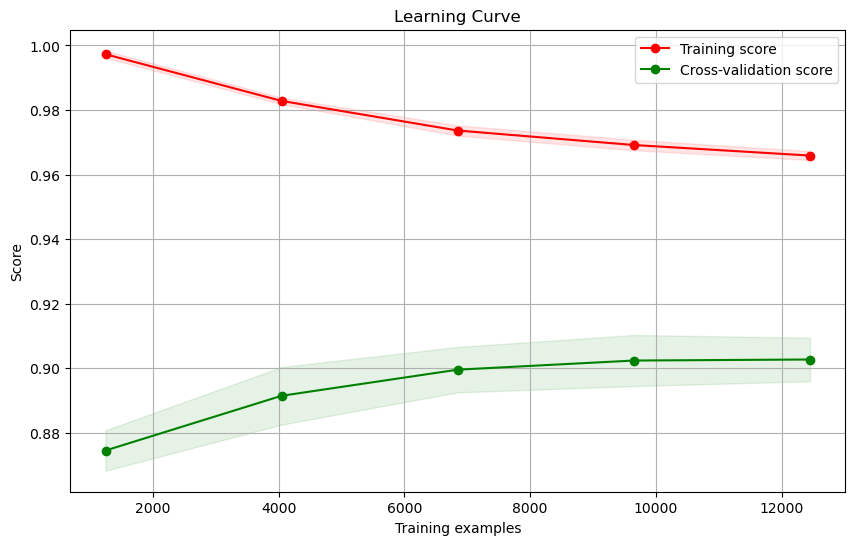

In [55]:
def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve(ensemble_model2, X_train_ensemble, y_train_ensemble, cv=5)
